In [1]:
import pandas
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from modules.data_preprocess import DataProcessor
from modules.regression import MovingTimeRegression, ElapsedTimeRegression
from modules.clustering import DifficultyLevelClustering

In [2]:
dataRoute = './data/'
cleanedRoute = './data/cleaned/'
resultsRoute = './results/'
profiledRoute = './profiling/'
regressionModelRoute = './results/models/regression/'
clusteringModelRoute = './results/models/clustering/'
scalerRoute = './results/scalers/'
paramsRoute = './results/params/'
csvFileName = 'data_2019_03_20.csv'
cleanedFileName = 'cleaned_data_2019_03_20.csv'
describeFileName = 'data_2019_03_20_DESCRIPTION.csv'
cleanedDescribeName = 'advanced_2019_03_20_DESCRIPTION.csv'

# Data processing

In [ ]:
dataProc = DataProcessor(dataRoute, cleanedRoute, profiledRoute, resultsRoute, csvFileName, describeFileName, cleanedDescribeName)

In [ ]:
dataProc.readRawData()

In [ ]:
dataProc.dropUselesColumns()

In [ ]:
dataProc.detectAndDropOutliers()

In [ ]:
len(dataProc.rawData[dataProc.rawData['workout_type'] < 10])

In [ ]:
len(dataProc.rawData[dataProc.rawData['age_group'] == 0])

In [ ]:
dataProc.showWeeklyInsightGraph(language='hun')

In [ ]:
dataProc.showDailyInsightGraph(language='hun')

In [ ]:
dataProc.oneHotEncodeFeatures()

In [ ]:
dataProc.saveAndProfileCleanedData()

# Regressions

### Moving time

In [3]:
movingTime = MovingTimeRegression(cleanedRoute, regressionModelRoute, scalerRoute, paramsRoute, cleanedFileName)

call .dataset to see the cleaned dataset


In [4]:
movingTime.prepareData()

In [ ]:
%%time
# WARNING : this function can take hours, and it does not have to be 
# executed because the generated files can be found under:
# ./data/results/params

# change the following variable to True to re-calculate the params
RUN_LONG_MOVING_TIME_CALCULATION = False
if RUN_LONG_MOVING_TIME_CALCULATION:
    movingTime.calulateBestParamsForRandomForest()

In [5]:
%%time
movingTime.trainModels(verbose=True, writeToFile=True)

-- Fitting models on all data -- 
Calculating best params for Ridge...
Done. Params: 
{'alpha': 0.3, 'solver': 'saga', 'score': 0.9355888971404649}

Calculating best params for Lasso...
Done. Params: 
{'alpha': 0.0001, 'score': 0.9355830713138577}

Loading best params for RandomForest...
Done. Params: 
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 500}

Scores on allTesty data: 
 - Ridge: 0.9355611802036214
 - Lasso: 0.9355830713138577
 - RandomForest: 0.9106753817599262

-- Fitting models on reduced data --
Calculating best params for Ridge...
Done. Params: 
{'alpha': 0.1, 'solver': 'sag', 'score': 0.9338021892654039}

Calculating best params for Lasso...
Done. Params: 
{'alpha': 0.0001, 'score': 0.9337842019819873}

Loading best params for RandomForest...
Done. Params: 
{'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 500}

Scores on reudcedTesty data: 
 - Ridge: 0.9337830821535328
 - Lasso: 0.9337842019819873
 - RandomForest: 0.9080032922285096

--

In [8]:
# the all prediction func. is excepting a list with 27 elements, where the values shoud
# represent the columns of the allTrainX or the dataset (in the second case ignore
# the moving_time and the elapsed_time columns)
# easy test case:
# - select a row from dataset with: mlRegression.dataset.iloc[i]
# - use: testData.drop(labels=['moving_time','elapsed_time','average_speed']).tolist() as param of the function
# a generated list: TODO
testData = movingTime.dataset.iloc[100]
print('predicted values')
movingTime.getPredictionWithAllModels(testData.drop(labels=['moving_time','elapsed_time','average_speed']).tolist())
print('original value:')
print(testData['moving_time'])

 - ridge: [23499.02747525]
 - lasso: [23503.54740286]
 - random forest: [23797.09177235]
Good value:
20986.0


In [ ]:
testData['moving_time']

In [ ]:
# the base prediction function except a list with 5 element, where the values should
# represent: distance, elev_high, elev_low, total_elevation_gain, trainer_onehot
# example 1: [22000, 500, 100, 700, 1.0]
# example 2: [102977.0, 476.0, 241.0, 968.0, 0.0]
movingTime.getPredictionWithBaseModels([102977.0, 476.6, 241.6, 968.0, 0.0])

In [ ]:
# to get predictions without retraining the models call 
# loadTrainedModelsAndScalers() and then one of the prediction making functions

### Elapsed time

In [3]:
elapsedTime = ElapsedTimeRegression(cleanedRoute, regressionModelRoute, scalerRoute, paramsRoute, cleanedFileName)

call .dataset to see the cleaned dataset


In [4]:
elapsedTime.prepareData()

In [ ]:
%%time
# WARNING : this function will take several hours, and it does not have to be 
# executed because the generated files can be found under:
# ./data/results/params

# change the following variable to True to re-calculate the params
RUN_LONG_ELAPSED_TIME_CALCULATION = False
if RUN_LONG_ELAPSED_TIME_CALCULATION:
    elapsedTime.calulateBestParamsForRandomForest()

In [5]:
elapsedTime.trainModels(verbose=True, writeToFile=False)

-- Fitting models on all data -- 
Calculating best params for Ridge...
Done. Params: 
{'alpha': 0.6, 'solver': 'lsqr', 'score': 0.759165473170257}

Calculating best params for Lasso...
Done. Params: 
{'alpha': 0.6, 'score': 0.7579656854878355}

Loading best params for RandomForest...
Done. Params: 
{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 500}

Scores on allTesty data: 
 - Ridge: 0.7591654731702568
 - Lasso: 0.7579656854878355
 - Random Forest: 0.8136721544227736

-- Fitting models on reduced data --
Calculating best params for Ridge...
Done. Params: 
{'alpha': 0.6, 'solver': 'saga', 'score': 0.7751584747031695}

Calculating best params for Lasso...
Done. Params: 
{'alpha': 0.6, 'score': 0.7751370659404205}

Loading best params for RandomForest...
Done. Params: 
{'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 500}

Scores on reducedTesty data: 
 - Ridge: 0.7751710813267236
 - Lasso: 0.7751370659404205
 - Random Forest: 0.8125207806479523

-- Fit

In [7]:
len(elapsedTime.userTestX)

747

In [ ]:
elapsedTime.loadTrainedModelsAndScalers()

In [ ]:
len(elapsedTime.userTrainX.columns)

In [ ]:
# to get predictions without retraining the models call 
# loadTrainedModelsAndScalers() and then one of the prediction making functions

# Clustering

In [3]:
difficultyLevels = DifficultyLevelClustering(cleanedRoute, clusteringModelRoute, resultsRoute, cleanedFileName)

In [4]:
difficultyLevels.prepareData()

### Age group 0

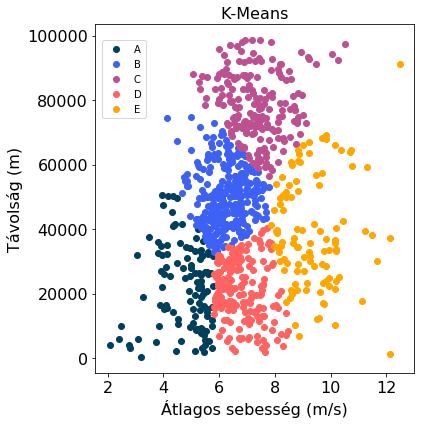

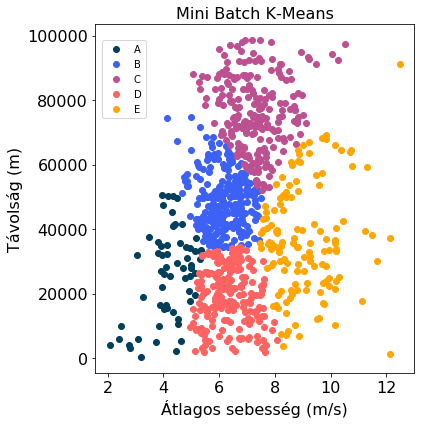

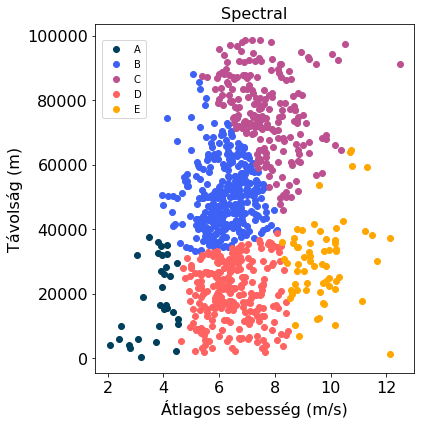

 -- Cluster information: --
 - A : norm to high distance - norm speed
 - B : high distance - norm to high speed
 - C : ext. high distance - high to ext. high speed
 - D : norm distance - high speed
 - E : norm to high distance - ext. high speed


In [6]:
difficultyLevels.trainAgeNullModels(writeToFile=False, graphLang='hu')

### Age group 1

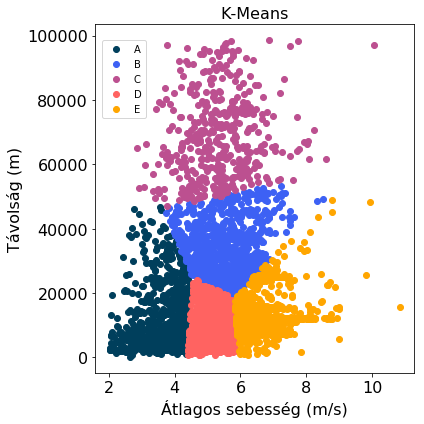

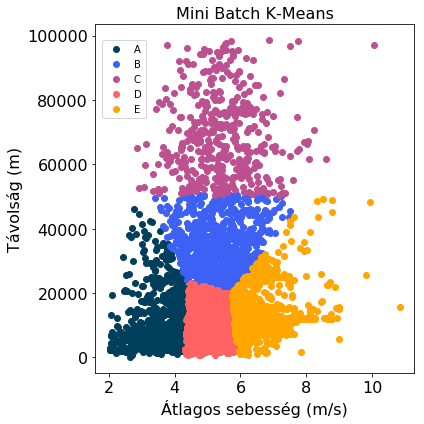

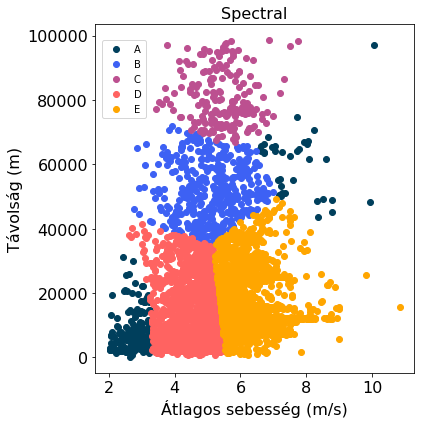

-- Cluster info --
 - A : norm to high distance - norm to ext. high speed
 - B : high distance - norm speed
 - C : ext. high distance - norm to ext. high speed
 - D : norm distance - high speed
 - E : norm to high distance - ext. high speed


In [7]:
difficultyLevels.trainAgeOneModels(writeToFile=False, graphLang='hu')

### Age group 2

Writing model pickle files for age group 2


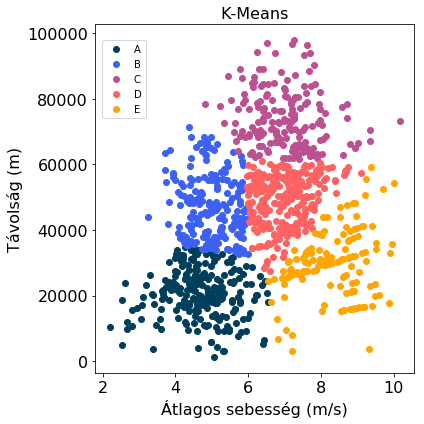

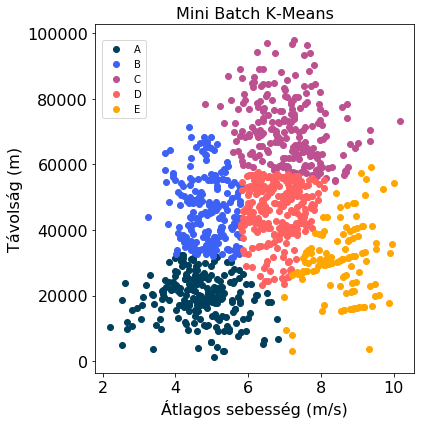

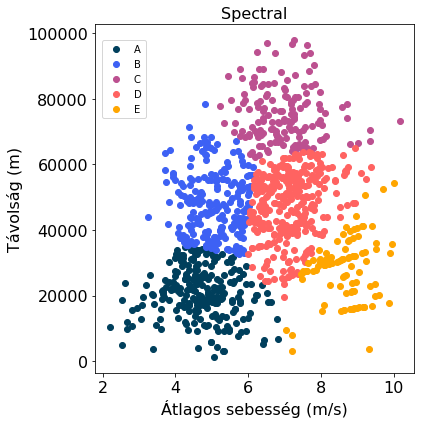

-- Cluster info --
 - A : norm distance - norm speed
 - B : high distance - norm speed
 - C : ext. distance - norm/high speed
 - D : high distance - high speed
 - E : norm distance - high speed


In [9]:
difficultyLevels.trainAgeTwoModels(writeToFile=True, graphLang='hu')

In [ ]:
# after training the models for the three age groups 
# OR 
# loading the saved models with: TODO function call
# call getTrainingSuggestions to get a suggestion for training.
# params:( 
#   ageGroup        - 0,1,2
#   clustering      - kmeans, minibatch, spectral
#   trainType       - A, B, C, D, E
#   trainDifficulty - 0.25, 0.5, 0.75
# )

In [63]:
difficultyLevels.mps_to_kmph(8.9)

32.04

In [49]:
nullCNormal

{'distance': 77410.3,
 'average_speed': 7.3035,
 'moving_time': 176.6511489924922}

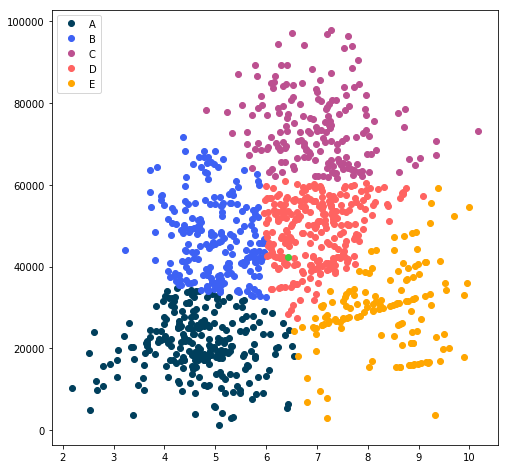

Training suggestion: 
 - distance: 42353.25 m  (42.35 km)
 - average speed: 6.4245 m/s  (23.13 km/h)
 - moving time: 1.0 hour(s) and 50.0 minute(s)


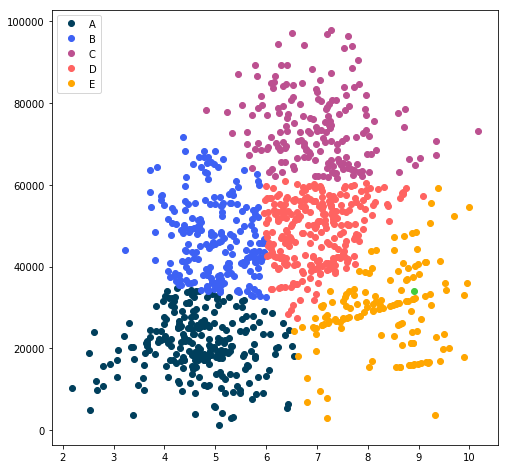

Training suggestion: 
 - distance: 33997.5 m  (34.0 km)
 - average speed: 8.916 m/s  (32.1 km/h)
 - moving time: 1.0 hour(s) and 4.0 minute(s)


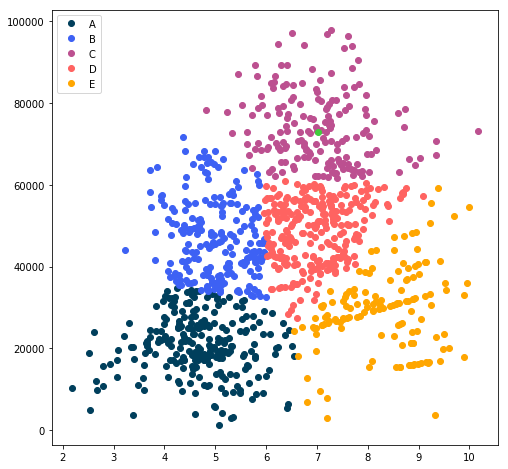

Training suggestion: 
 - distance: 72773.5 m  (72.77 km)
 - average speed: 7.0120000000000005 m/s  (25.24 km/h)
 - moving time: 2.0 hour(s) and 53.0 minute(s)


In [76]:
nullDHard = difficultyLevels.getTrainingSuggestions(2, 'kmeans', 'D', 0.25)
nullEEasy = difficultyLevels.getTrainingSuggestions(2, 'kmeans', 'E', 0.75)
nullCNormal = difficultyLevels.getTrainingSuggestions(2, 'kmeans', 'C', 0.50)

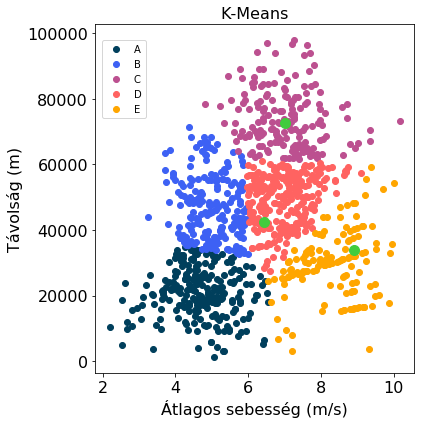

In [78]:
dataset = difficultyLevels.ageTwoInverted
clustering = 'kmeans'
c_column = dataset[clustering]
clusterNames = ['A', 'B', 'C', 'D', 'E']
lines = [0, 1, 2, 3, 4]
plotMarker = 'o'
fontSize = 16
colors = ['#003f5c', '#3d61f4', '#bc5090', '#ff6361', '#ffa600']
labels = {'graphTitle': 'Klaszterezési eredmények összehasonlítása',
                  'kmeans': 'K-Means',
                  'minibatch': 'Mini Batch K-Means',
                  'spectral': 'Spectral',
                  'xLabel': 'Átlagos sebesség (m/s)',
                  'yLabel': 'Távolság (m)'}

x = [nullDHard['average_speed'], nullCNormal['average_speed'], nullEEasy['average_speed']]
y = [nullDHard['distance'], nullCNormal['distance'], nullEEasy['distance']]

n = [1,2,3]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
# fig.suptitle(graphTitle)

for i in range(0, len(clusterNames)):
    lines[i] = ax.plot(dataset[c_column == clusterNames[i]]['average_speed'], dataset[c_column == clusterNames[i]]['distance'], plotMarker, c=colors[i], label=clusterNames[i], zorder=1)
ax.set_xlabel(labels['xLabel'], fontsize=fontSize)
ax.set_ylabel(labels['yLabel'], fontsize=fontSize)
ax.set_title(labels[clustering], fontsize=fontSize)
ax.tick_params(axis='both', labelsize=fontSize)
fig.legend(lines[0] + lines[1] + lines[2] + lines[3] + lines[4], clusterNames, loc=(0.24, 0.72))# from left, from bottom, %

ax.scatter(x, y, c='#41cc3d', s=100, zorder=2)
#for i, txt in enumerate(n):
#    ax.annotate(txt, (x[i], y[i]), fontsize=14, fontweight='bold')


plt.tight_layout()

if True:
    plt.savefig(fname='./graphs/age_group_2_training_suggestions.png', dpi=1000)
plt.show()